In [159]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def show_img(img):
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [166]:
def show_imgs(imgs, mse_t):
    fig, axes = plt.subplots(5, 5, figsize=(16,6))
    for row, img_progression in enumerate(imgs):
        for col, img in enumerate(img_progression):
            ax = axes[row, col]
            ax.imshow(np.clip(img.permute(1, 2, 0), 0.0, 1.0))
            ax.set_title(f"MSE={mse_t[row][col]:.4f}")
            ax.axis('off')

    axes[1, 2].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def forward_steps(x_prev, betas):
    x = x_prev.clone()
    x_diffusions = []

    for t, beta in enumerate(betas):
        eps = torch.randn_like(x)
        x = (torch.sqrt(1.0 - beta) * x) + (torch.sqrt(beta) * eps)

        if t in (0, 9, 49, 99, 499):
            x_diffusions.append(x.clone())
    return x_diffusions

In [170]:
def calculate_mse(diffusion_imgs):
    mse_t = []

    for imgs in diffusion_imgs:
        original = imgs[0]
        row = []
        for j, img in enumerate(imgs):
            row.append(F.mse_loss(img, original).item())
        mse_t.append(row)

    return mse_t

In [172]:
img1 = Image.open("evil_aardvark_ceo.png")
img2 = Image.open('kitty_phelps.png')
img3 = Image.open('sweet_bear.png')
img4 = Image.open('sad_stairs.png')
img5 = Image.open('santa.png')

transform = transforms.ToTensor()
img1, img2, img3, img4, img5 = transform(img1), transform(img2), transform(img3), transform(img4), transform(img5)
imgs = [img1, img2, img3, img4, img5]

In [173]:
T = 500
betas = torch.linspace(0.00001, 0.02, T)
imgs = [forward_steps(img, betas) for img in imgs]
mse_t = calculate_mse(imgs)

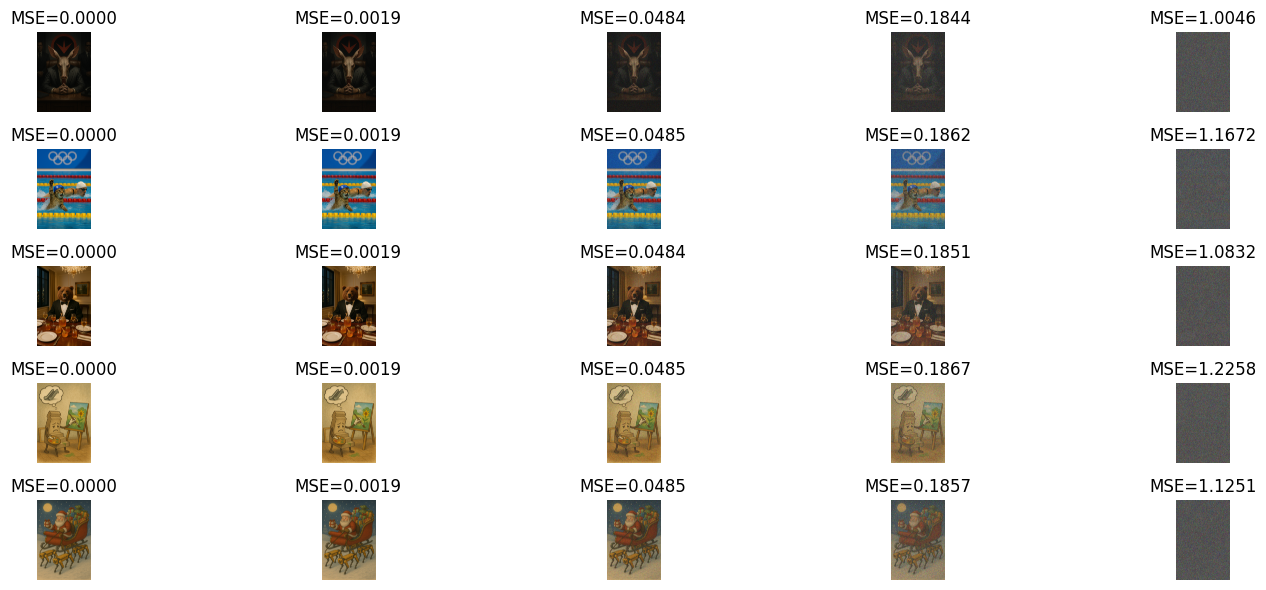

In [174]:
show_imgs(imgs, mse_t)